In [1]:
from threeML import *

import matplotlib

%matplotlib inline

Configuration read from /home/giacomov/.threeML/threeML_config.yml
Plotter is MatPlotlib


In [2]:
# Let's interrogate the 3FGL to get the sources in a radius of 20.0 deg around the Crab

lat_catalog = FermiLATSourceCatalog()

ra, dec, table = lat_catalog.search_around_source("Crab", radius=20.0)

table

        Use astroquery.vo_conesearch.vos_catalog.VOSCatalog instead. [astropy.utils.decorators]
        Use astroquery.vo_conesearch.vos_catalog.VOSCatalog instead.
        Use astroquery.vo_conesearch.vos_catalog.VOSBase instead. [astropy.utils.decorators]
        Use astroquery.vo_conesearch.vos_catalog.VOSBase instead.


Trying https://heasarc.gsfc.nasa.gov/cgi-bin/vo/cone/coneGet.pl?table=fermilpsc&


name,source_type,ra,dec,assoc_name_1,tevcat_assoc,Search_Offset
,,deg,deg,,,
object,str52,float64,float64,object,object,float64
3FGL J0534.5+2201i,pulsar wind nebula,83.6331,22.0199,Crab,Crab,0.3267
3FGL J0534.5+2201s,pulsar wind nebula,83.6331,22.0199,Crab,Crab,0.3267
3FGL J0534.5+2201,"pulsar, identified by pulsations",83.6372,22.0241,PSR J0534+2200,Crab Pulsar,0.6196
3FGL J0526.4+2247,unknown,81.6091,22.7980,,,121.7217
3FGL J0544.7+2239,unknown,86.1758,22.6572,,,146.2810
3FGL J0521.7+2113,BL Lac type of blazar,80.4431,21.2224,TXS 0518+211,VER J0521+211,184.1749
3FGL J0528.3+1815,active galaxy of uncertain type,82.0780,18.2608,1RXS J052829.6+181657,,241.6508
3FGL J0538.9+1646,unknown,84.7486,16.7734,,,320.7307


In [3]:
# This gets a 3ML model (a Model instance) from the table above, where every source
# in the 3FGL becomes a Source instance. Note that by default all parameters of all
# sources are fixed

model = lat_catalog.get_model()

# Let's free all the normalizations within 3 deg from the center
model.free_point_sources_within_radius(3.0, normalization_only=True)

model.display()


WARNING UserWarning: Source 3FGL J0540.3+2756e is extended, support for extended source is not here yet. I will ignoreit


WARNING UserWarning: Source 3FGL J0617.2+2234e is extended, support for extended source is not here yet. I will ignoreit



Model summary:
==============

                   N
Point sources     90
Extended sources   0
Particle sources   0

Free parameters (5):
--------------------

                                           value    min_value    max_value  \
Crab_IC.spectrum.main.Powerlaw.K     1.83367e-14  1.83367e-17  1.83367e-11   
Crab_synch.spectrum.main.Powerlaw.K  1.14476e-11  1.14476e-14  1.14476e-08   
PSR_J0534p2200...K                    5.5413e-13   5.5413e-16   5.5413e-10   
_3FGL_J0526d4p2247...K               1.45001e-16  1.45001e-19  1.45001e-13   
_3FGL_J0544d7p2239...K               5.14049e-16  5.14049e-19  5.14049e-13   

                                               unit  
Crab_IC.spectrum.main.Powerlaw.K     cm-2 keV-1 s-1  
Crab_synch.spectrum.main.Powerlaw.K  cm-2 keV-1 s-1  
PSR_J0534p2200...K                   cm-2 keV-1 s-1  
_3FGL_J0526d4p2247...K               cm-2 keV-1 s-1  
_3FGL_J0544d7p2239...K               cm-2 keV-1 s-1  

Fixed parameters (465):
(abridged. Use complete=True to see all fixed parameters)


Linked parameters (0):
----------------------

(none)

In [4]:
# but then let's fix the sync and the IC components of the Crab
# (cannot fit them with just one day of data)
# (these two methods are equivalent)
model['Crab_IC.spectrum.main.Powerlaw.K'].fix = True
model.Crab_synch.spectrum.main.Powerlaw.K.fix = True

# However, let's free the index of the Crab
model.PSR_J0534p2200.spectrum.main.Cutoff_powerlaw.index.free = True

model.display()

Model summary:
==============

                   N
Point sources     90
Extended sources   0
Particle sources   0

Free parameters (4):
--------------------

                              value    min_value    max_value            unit
PSR_J0534p2200...K       5.5413e-13   5.5413e-16   5.5413e-10  cm-2 keV-1 s-1
PSR_J0534p2200...index     -2.04501          -10           10                
_3FGL_J0526d4p2247...K  1.45001e-16  1.45001e-19  1.45001e-13  cm-2 keV-1 s-1
_3FGL_J0544d7p2239...K  5.14049e-16  5.14049e-19  5.14049e-13  cm-2 keV-1 s-1

Fixed parameters (466):
(abridged. Use complete=True to see all fixed parameters)


Linked parameters (0):
----------------------

(none)

In [5]:
# Download data from Jan 01 2010 to Jan 7 2010

tstart = '2010-01-01 00:00:00'
tstop = '2010-02-01 00:00:00'

# Note that this will understand if you already download these files, and will
# not do it twice unless you change your selection or the outdir

evfile, scfile = download_LAT_data(ra, dec, 20.0, 
                             tstart, tstop, time_type='Gregorian', 
                             destination_directory='Crab_data')

Existing event file /home/giacomov/develop/3ML/examples/Crab_data/L170626171048F357373F56_PH00.fits and Spacecraft file /home/giacomov/develop/3ML/examples/Crab_data/L170626171048F357373F56_SC00.fits correspond to the same selection. We assume you did not tamper with them, so we will return those instead of downloading them again. If you want to download them again, remove them from the outdir


In [6]:
# Configuration for Fermipy

config = FermipyLike.get_basic_config(evfile=evfile, scfile=scfile, ra=ra, dec=dec)

# See what we just got

config.display()

binning:
  roiwidth: 10.0
  binsz: 0.1
  binsperdec: 8
data:
  evfile: /home/giacomov/develop/3ML/examples/Crab_data/L170626171048F357373F56_PH00.fits
  scfile: /home/giacomov/develop/3ML/examples/Crab_data/L170626171048F357373F56_SC00.fits
selection:
  emin: 100.0
  emax: 100000.0
  zmax: 100.0
  evclass: 128
  evtype: 3
  filter: DATA_QUAL>0 && LAT_CONFIG==1
  ra: 83.63322002468244
  dec: 22.014454886627657



binning:
 roiwidth: 10.0
 binsz: 0.1
 binsperdec: 8
data:
 evfile: /home/giacomov/develop/3ML/examples/Crab_data/L170626171048F357373F56_PH00.fits
 scfile: /home/giacomov/develop/3ML/examples/Crab_data/L170626171048F357373F56_SC00.fits
selection:
 emin: 100.0
 emax: 100000.0
 zmax: 100.0
 evclass: 128
 evtype: 3
 filter: DATA_QUAL>0 && LAT_CONFIG==1
 ra: 83.63322002468244
 dec: 22.014454886627657

In [7]:
# You can of course modify the configuration as a dictionary
config['selection']['emax'] = 300000.0

# and even add sections
config['gtlike'] = {'edisp': False}

config.display()

binning:
  roiwidth: 10.0
  binsz: 0.1
  binsperdec: 8
data:
  evfile: /home/giacomov/develop/3ML/examples/Crab_data/L170626171048F357373F56_PH00.fits
  scfile: /home/giacomov/develop/3ML/examples/Crab_data/L170626171048F357373F56_SC00.fits
gtlike:
  edisp: false
selection:
  emin: 100.0
  emax: 300000.0
  zmax: 100.0
  evclass: 128
  evtype: 3
  filter: DATA_QUAL>0 && LAT_CONFIG==1
  ra: 83.63322002468244
  dec: 22.014454886627657



binning:
 roiwidth: 10.0
 binsz: 0.1
 binsperdec: 8
data:
 evfile: /home/giacomov/develop/3ML/examples/Crab_data/L170626171048F357373F56_PH00.fits
 scfile: /home/giacomov/develop/3ML/examples/Crab_data/L170626171048F357373F56_SC00.fits
gtlike:
 edisp: false
selection:
 emin: 100.0
 emax: 300000.0
 zmax: 100.0
 evclass: 128
 evtype: 3
 filter: DATA_QUAL>0 && LAT_CONFIG==1
 ra: 83.63322002468244
 dec: 22.014454886627657

In [8]:
#Let's create an instance of the plugin
# Note that here no processing is made, because fermipy still doesn't know
# about the model you want to use

LAT = FermipyLike("LAT", config)

# The plugin modifies the configuration as needed to get the output files
# in a unique place, which will stay the same as long as your selection does not change
config.display()

binning:
  roiwidth: 10.0
  binsz: 0.1
  binsperdec: 8
data:
  evfile: /home/giacomov/develop/3ML/examples/Crab_data/L170626171048F357373F56_PH00.fits
  scfile: /home/giacomov/develop/3ML/examples/Crab_data/L170626171048F357373F56_SC00.fits
fileio:
  outdir: __073545c80dcb57fdfdc364a41e99eda8
gtlike:
  edisp: false
selection:
  emin: 100.0
  emax: 300000.0
  zmax: 100.0
  evclass: 128
  evtype: 3
  filter: DATA_QUAL>0 && LAT_CONFIG==1
  ra: 83.63322002468244
  dec: 22.014454886627657



binning:
 roiwidth: 10.0
 binsz: 0.1
 binsperdec: 8
data:
 evfile: /home/giacomov/develop/3ML/examples/Crab_data/L170626171048F357373F56_PH00.fits
 scfile: /home/giacomov/develop/3ML/examples/Crab_data/L170626171048F357373F56_SC00.fits
fileio:
 outdir: __073545c80dcb57fdfdc364a41e99eda8
gtlike:
 edisp: false
selection:
 emin: 100.0
 emax: 300000.0
 zmax: 100.0
 evclass: 128
 evtype: 3
 filter: DATA_QUAL>0 && LAT_CONFIG==1
 ra: 83.63322002468244
 dec: 22.014454886627657

In [9]:
data = DataList(LAT)

# Here is where the fermipy processing happens (the .setup method)
jl = JointLikelihood(model, data)


Found Galactic template for IRF. P8R2_SOURCE_V6: /home/giacomov/software/Fermi/build_v10r0p5_noroot/x86_64-unknown-linux-gnu-libc2.23-0/refdata/fermi/galdiffuse/gll_iem_v06.fits

Cutting the template around the ROI: 




WARNING UserWarning: Overwriting existing file 'gll_iem_v06_cut.fits'.

2017-06-27 01:43:12 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 0.13.5 
ScienceTools version 


Center is (35.964107914,673.727731272) pixel, (184.558013489,-5.78403359104) sky
Approximating the X pixel: 35.964107914 -> 35
Approximating the Y pixel: 673.727731272 -> 673
X range -> -20 - 92
Y range -> 618 - 730
Input image shape is ([z],y,x) = (30, 1441, 2880)

Found Isotropic template for irf P8R2_SOURCE_V6: /home/giacomov/software/Fermi/build_v10r0p5_noroot/x86_64-unknown-linux-gnu-libc2.23-0/refdata/fermi/galdiffuse/iso_P8R2_SOURCE_V6_v06.txt


2017-06-27 01:44:02 INFO    GTAnalysis.setup(): Running setup.
2017-06-27 01:44:02 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2017-06-27 01:44:02 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2017-06-27 01:44:02 INFO    GTBinnedAnalysis._create_ltcube(): Skipping LT Cube.
2017-06-27 01:44:03 INFO    GTBinnedAnalysis._create_expcube(): Skipping gtexpcube.
2017-06-27 01:44:03 INFO    GTBinnedAnalysis._create_srcmaps(): Skipping gtsrcmaps.
2017-06-27 01:44:03 INFO    GTBinnedAnalysis.setup(): Finished setup for component 00
2017-06-27 01:44:03 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2017-06-27 01:44:12 INFO    GTAnalysis.setup(): Initializing source properties
2017-06-27 01:44:13 INFO    GTAnalysis.setup(): Finished setup.
2017-06-27 01:44:13 INFO    GTAnalysis.free_source(): Fixing parameters for Crab_IC               : ['Prefactor']
2017-06-27 01:44:13 INFO    GTAnalysis.free_source(): Fixing

In [10]:
jl.set_minimizer("ROOT")

res = jl.fit()


WARNING UserWarning: get_number_of_data_points not implemented, values for statistical measurements such as AIC or BIC are unreliable



Best fit values:



,result,unit
parameter,,
PSR_J0534p2200.spectrum.main.Cutoff_powerlaw.K,(5.650 +/- 0.14) x 10^-13,1 / (cm2 keV s)
PSR_J0534p2200.spectrum.main.Cutoff_powerlaw.index,-2.028 +/- 0.024,
_3FGL_J0526d4p2247.spectrum.main.Powerlaw.K,(5.2 -2.0 +3.2) x 10^-16,1 / (cm2 keV s)
_3FGL_J0544d7p2239.spectrum.main.Powerlaw.K,(1.9 -0.7 +1.1) x 10^-15,1 / (cm2 keV s)



Correlation matrix:



1.00,0.27,-0.24,-0.20
0.27,1.00,0.21,0.21
-0.24,0.21,1.00,0.05
-0.20,0.21,0.05,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
LAT,119059.582722
total,119059.582722



Values of statistical measures:



,statistical measures
AIC,238117.165444
BIC,238119.165444


In [11]:
#Now let's compute the errors on the best fit parameters

res = jl.get_errors()

,result,unit
parameter,,
PSR_J0534p2200.spectrum.main.Cutoff_powerlaw.K,(5.650 +/- 0.14) x 10^-13,1 / (cm2 keV s)
PSR_J0534p2200.spectrum.main.Cutoff_powerlaw.index,-2.028 +/- 0.024,
_3FGL_J0526d4p2247.spectrum.main.Powerlaw.K,(5.2 -2.4 +2.6) x 10^-16,1 / (cm2 keV s)
_3FGL_J0544d7p2239.spectrum.main.Powerlaw.K,(1.9 -0.8 +1.1) x 10^-15,1 / (cm2 keV s)


In [12]:
#We might also want to look at the profile of the likelihood for
#each parameter.

res = jl.get_contours(model.PSR_J0534p2200.spectrum.main.Cutoff_powerlaw.index,-2.2,-1.4,30)

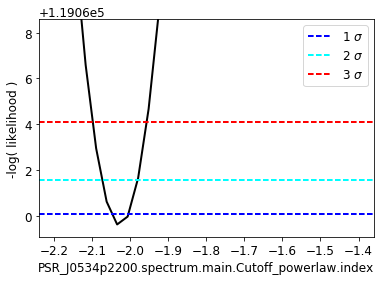

In [14]:
res[-1]

In [15]:
#Or we might want to produce a contour plot
%prun jl.get_contours('PSR_J0534p2200.spectrum.main.Cutoff_powerlaw.K',0.3e-12,1e-12, 10, 'PSR_J0534p2200.spectrum.main.Cutoff_powerlaw.index',-2.3,-1.3, 10)

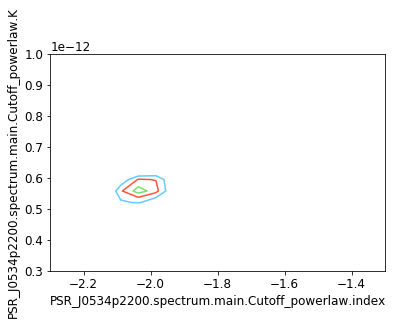

In [12]:
res[-1]

In [ ]:
# We can also do a bayesian analysis

# This will set priors based on the current defined min-max (log-uniform or uniform)

model.PSR_J0534p2200.spectrum.main.Cutoff_powerlaw.K.set_uninformative_prior(Log_uniform_prior)
model.PSR_J0534p2200.spectrum.main.Cutoff_powerlaw.index.set_uninformative_prior(Uniform_prior)
model._3FGL_J0526d4p2247.spectrum.main.Powerlaw.K.set_uninformative_prior(Log_uniform_prior)
model._3FGL_J0544d7p2239.spectrum.main.Powerlaw.K.set_uninformative_prior(Log_uniform_prior)

In [15]:
bayes = BayesianAnalysis(model, data)

# Sample with emcee
# Note that n_samples is the number of samples *per walker*, so you will get n_samples * n_walers samples
# at the end

samples = bayes.sample(n_walkers=20,burn_in=100, n_samples=1000)


Found Galactic template for IRF. P8R2_SOURCE_V6: /home/giacomov/software/Fermi/public_st/ScienceTools-v10r0p5-fssc-20150518-x86_64-unknown-linux-gnu-libc2.19-10-without-root/x86_64-unknown-linux-gnu-libc2.19-10/refdata/fermi/galdiffuse/gll_iem_v06.fits

Cutting the template around the ROI: 



2016-12-22 04:09:53 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
This is fermipy version 0.12.1+95.ga26e 
ScienceTools version 


Center is (35.9633205358,673.727091515) pixel, (184.557915067,-5.78411356063) sky
Approximating the X pixel: 35.9633205358 -> 35
Approximating the Y pixel: 673.727091515 -> 673
X range -> -20 - 92
Y range -> 618 - 730
Input image shape is ([z],y,x) = (30, 1441, 2880)

Found Isotropic template for irf P8R2_SOURCE_V6: /home/giacomov/software/Fermi/public_st/ScienceTools-v10r0p5-fssc-20150518-x86_64-unknown-linux-gnu-libc2.19-10-without-root/x86_64-unknown-linux-gnu-libc2.19-10/refdata/fermi/galdiffuse/iso_P8R2_SOURCE_V6_v06.txt


2016-12-22 04:10:15 INFO    GTAnalysis.setup(): Running setup.
2016-12-22 04:10:15 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2016-12-22 04:10:15 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2016-12-22 04:10:15 INFO    GTBinnedAnalysis._create_ltcube(): Skipping LT Cube.
2016-12-22 04:10:16 INFO    GTBinnedAnalysis._create_expcube(): Skipping gtexpcube.
2016-12-22 04:10:16 INFO    GTBinnedAnalysis._create_srcmaps(): Skipping gtsrcmaps.
2016-12-22 04:10:16 INFO    GTBinnedAnalysis.setup(): Finished setup for component 00
2016-12-22 04:10:16 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2016-12-22 04:10:28 INFO    GTAnalysis.setup(): Initializing source properties
2016-12-22 04:10:29 INFO    GTAnalysis.setup(): Finished setup.


Running burn-in of 100 samples...


Sampling...


Mean acceptance fraction: 0.45555


In [16]:
credible_intervals = bayes.get_credible_intervals()

Name,Value,Unit
PSR_J0534p2200.spectrum.main.Cutoff_powerlaw.K,(5.50 -0.14 +0.14)e-13,1 / (cm2 keV s)
PSR_J0534p2200.spectrum.main.Cutoff_powerlaw.index,-2.000 -0.026 +0.022,
_3FGL_J0526d4p2247.spectrum.main.Powerlaw.K,(3.1 -1.6 +2.0)e-16,1 / (cm2 keV s)
_3FGL_J0544d7p2239.spectrum.main.Powerlaw.K,(5.2 -3.0 +5)e-16,1 / (cm2 keV s)



(probability 68)


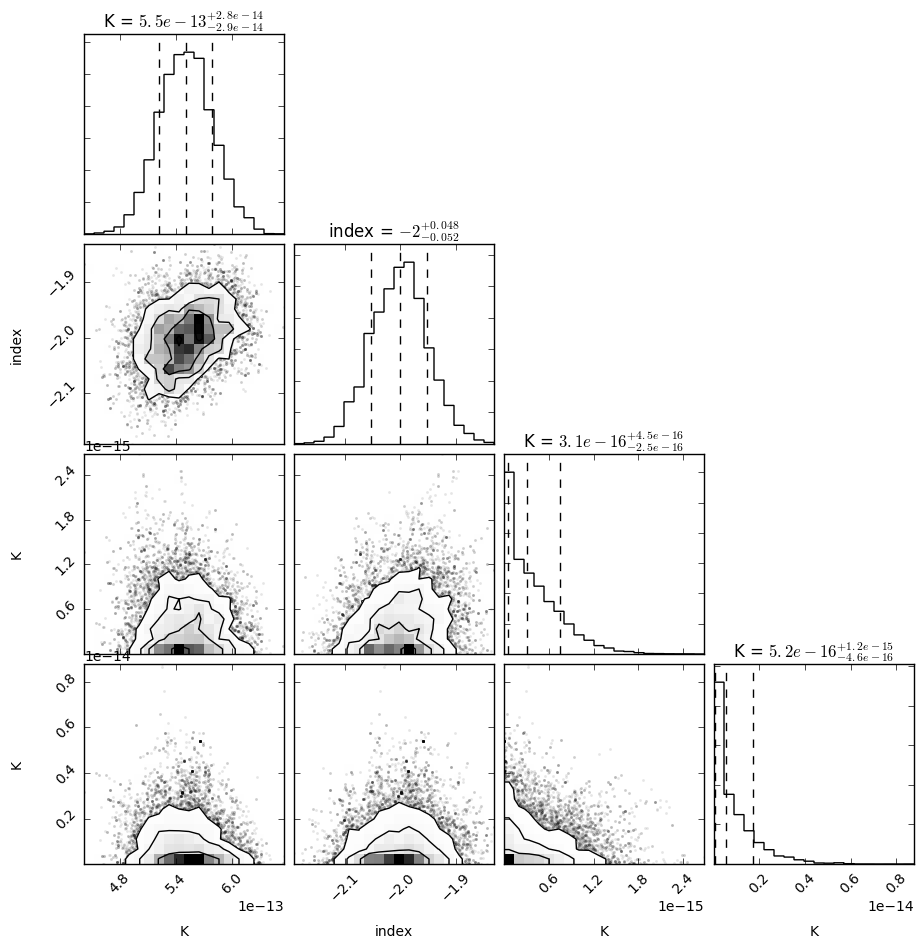

In [17]:
# (red lines in the marginal distributions are the priors)

corner_figure = bayes.corner_plot()